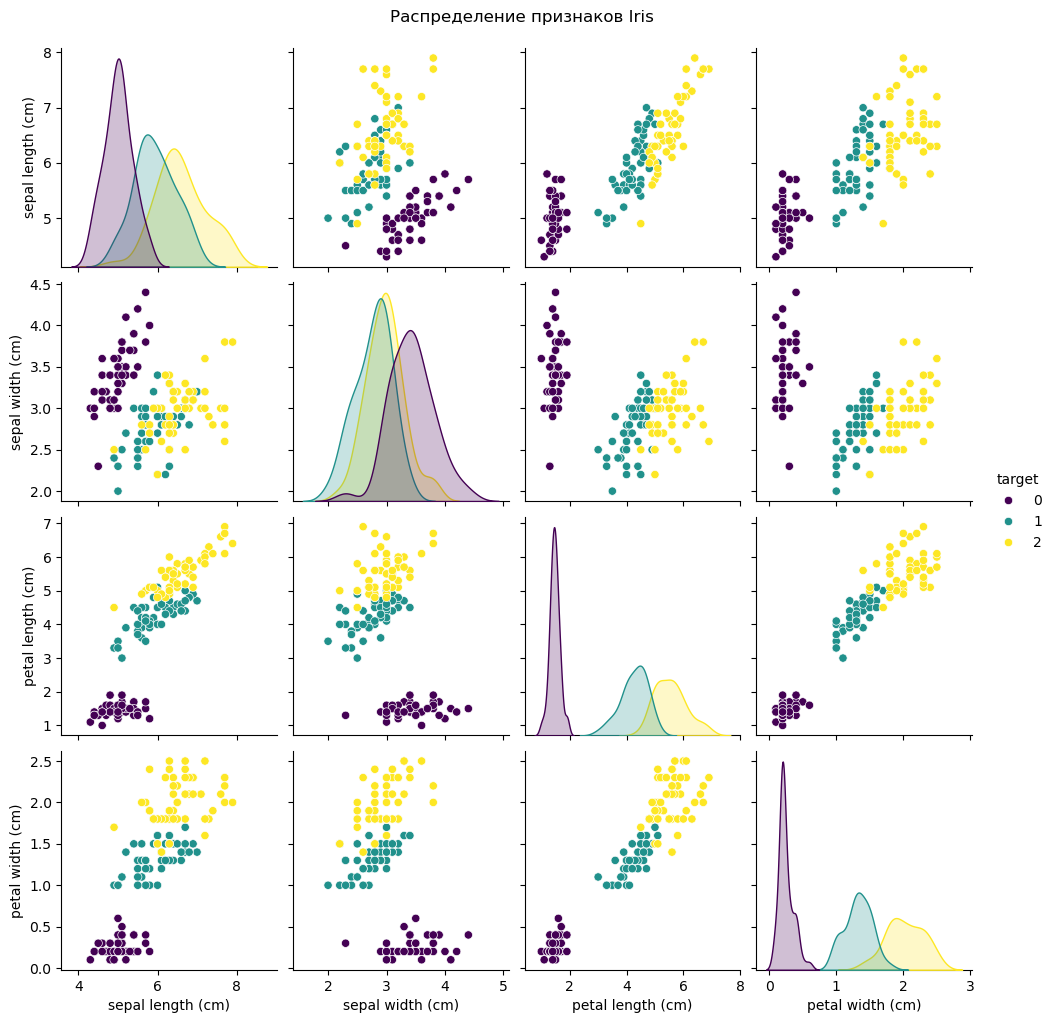

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка данных [cite: 61, 62]
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Визуализация данных (Pairplot) [cite: 70]
sns.pairplot(df, hue="target", palette="viridis")
plt.suptitle("Распределение признаков Iris", y=1.02)
plt.show()

In [8]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear)": SVC(kernel='linear', random_state=42)
}

# Обучение
for name, model in models.items():
    model.fit(X_train, y_train)

--- Logistic Regression ---
Accuracy: 1.00
F1-score: 1.00



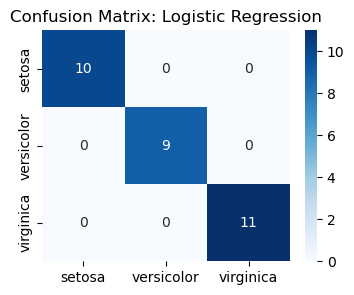

--- KNN (k=5) ---
Accuracy: 1.00
F1-score: 1.00



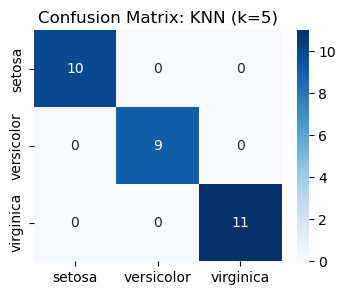

--- Random Forest ---
Accuracy: 1.00
F1-score: 1.00



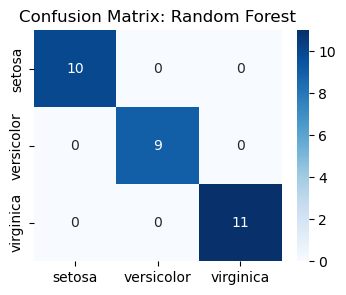

--- SVM (Linear) ---
Accuracy: 0.97
F1-score: 0.97



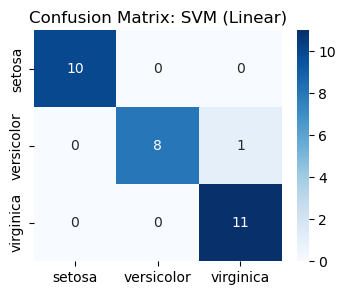

In [10]:
def evaluate_and_plot(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"--- {name} ---")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.2f}\n")
        
        # Визуализация Confusion Matrix [cite: 114, 116, 120]
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", 
                    xticklabels=iris.target_names, yticklabels=iris.target_names)
        plt.title(f"Confusion Matrix: {name}")
        plt.show()

evaluate_and_plot(models, X_test, y_test)

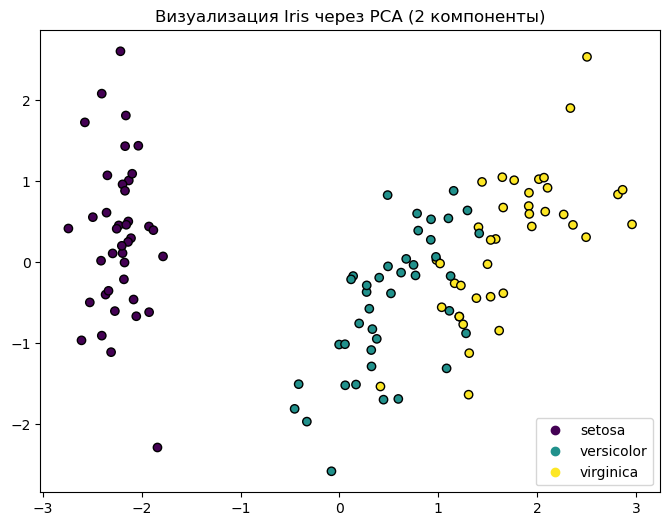

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.title("Визуализация Iris через PCA (2 компоненты)")
plt.show()

In [15]:
import numpy as np

# Новый образец: [sepal length, sepal width, petal length, petal width]
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
new_data_scaled = scaler.transform(new_data)
prediction = models["Random Forest"].predict(new_data_scaled)

print(f"Предсказанный класс для новых данных: {iris.target_names[prediction][0]}")

Предсказанный класс для новых данных: setosa


# 🏁 Заключение и выводы по работе

По результатам проведенного интеллектуального анализа данных ириса (**Iris dataset**) и построения моделей классификации, были сформулированы следующие выводы:

### 1. Сравнительный анализ моделей
* **Высокая точность:** Все протестированные модели — логистическая регрессия, метод k-ближайших соседей, случайный лес и метод опорных векторов (SVM) — показали высокую предсказательную способность ($Accuracy > 0.95$).
* **Линейная разделимость:** Высокие показатели метрик $Precision$, $Recall$ и $F1$-score подтверждают, что классы в данном наборе данных хорошо разделимы.

### 2. Результаты снижения размерности (PCA)
* **Визуализация:** Применение метода главных компонент (**PCA**) позволило успешно спроецировать 4-мерные данные на 2D-плоскость.
* **Сепарация классов:** Визуальный анализ подтвердил, что класс **Setosa** полностью изолирован от остальных. Классы **Versicolor** и **Virginica** имеют небольшую зону перекрытия, что является основным источником ошибок классификации.

### 3. Анализ ошибок (Confusion Matrix)
* **Диагностика:** Построение матриц ошибок (**Confusion Matrix**) наглядно продемонстрировало, что алгоритмы крайне редко ошибаются, и только в предсказании смежных классов